# Global Power Plant Database

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Data Cleaning

In [7]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

From 27 column we have 19 columns with missing values:
    
    * latitude                     
    * longitude                    
    * other_fuel1                 
    * other_fuel2                 
    * other_fuel3                 
    * commissioning_year          
    * owner    
    * geolocation_source           
    * wepp_id                     
    * year_of_capacity_data       
    * generation_gwh_2013         
    * generation_gwh_2014         
    * generation_gwh_2015         
    * generation_gwh_2016         
    * generation_gwh_2017         
    * generation_gwh_2018         
    * generation_gwh_2019         
    * generation_data_source      
    * estimated_generation_gwh 
    
Check the percentage of missing values,if it is 80% or more than 80% then we drop those columns

In [8]:
print('latitude:',data['latitude'].isnull().sum()/len(data['latitude']))  
print('longitude:',data['longitude'].isnull().sum()/len(data['longitude']))
print('other_fuel1:',data['other_fuel1'].isnull().sum()/len(data['other_fuel1']))
print('other_fuel2:',data['other_fuel2'].isnull().sum()/len(data['other_fuel2']))
print('other_fuel3:',data['other_fuel3'].isnull().sum()/len(data['other_fuel3'])) 
print('commissioning_year:',data['commissioning_year'].isnull().sum()/len(data['commissioning_year'])) 
print('owner:',data['owner'].isnull().sum()/len(data['owner']))
print('geolocation_source:',data['geolocation_source'].isnull().sum()/len(data['geolocation_source']))
print('wepp_id:',data['wepp_id'].isnull().sum()/len(data['wepp_id'])) 
print('year_of_capacity_data:',data['year_of_capacity_data'].isnull().sum()/len(data['year_of_capacity_data']))
print('generation_gwh_2013:',data['generation_gwh_2013'].isnull().sum()/len(data['generation_gwh_2013'])) 
print('generation_gwh_2014:',data['generation_gwh_2014'].isnull().sum()/len(data['generation_gwh_2014'])) 
print('generation_gwh_2015:',data['generation_gwh_2015'].isnull().sum()/len(data['generation_gwh_2015'])) 
print('generation_gwh_2016:',data['generation_gwh_2016'].isnull().sum()/len(data['generation_gwh_2016']))
print('generation_gwh_2017:',data['generation_gwh_2017'].isnull().sum()/len(data['generation_gwh_2017'])) 
print('generation_gwh_2018:',data['generation_gwh_2018'].isnull().sum()/len(data['generation_gwh_2018'])) 
print('generation_gwh_2019:',data['generation_gwh_2019'].isnull().sum()/len(data['generation_gwh_2019']))
print('generation_data_source:',data['generation_data_source'].isnull().sum()/len(data['generation_data_source'])) 
print('estimated_generation_gwh:',data['estimated_generation_gwh'].isnull().sum()/len(data['estimated_generation_gwh']))

latitude: 0.050716648291069456
longitude: 0.050716648291069456
other_fuel1: 0.7816979051819184
other_fuel2: 0.9988974641675854
other_fuel3: 1.0
commissioning_year: 0.4189636163175303
owner: 0.6229327453142227
geolocation_source: 0.020948180815876516
wepp_id: 1.0
year_of_capacity_data: 0.42778390297684676
generation_gwh_2013: 1.0
generation_gwh_2014: 0.5611907386990077
generation_gwh_2015: 0.5347298787210585
generation_gwh_2016: 0.5214994487320838
generation_gwh_2017: 0.5148842337375965
generation_gwh_2018: 0.5060639470782801
generation_gwh_2019: 1.0
generation_data_source: 0.5049614112458655
estimated_generation_gwh: 1.0


There are six column having 99 and 100 percent of missing values and we drop them :

    * other_fuel2
    * other_fuel3
    * wepp_id
    * generation_gwh_2013
    * generation_gwh_2019
    * estimated_generation_gwh

In [9]:
data=data.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']
              ,axis=1)
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [10]:
data.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

There are 11 objects columns which can be convert into float data type by encoding Technique

                                              Fill null values

In [11]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['other_fuel1']=data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [12]:
data.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now,there is no missing values

                                    Convert primary_fuel into binary classification

In [13]:
data['primary_fuel']=data['primary_fuel'].replace(['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],
                                                 ['Renewable','Thermal','Renewable','Thermal','Renewable','Thermal','Thermal',
                                                 'Thermal'])

In [13]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Renewable,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Thermal,Oil,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Renewable,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Thermal,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Thermal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# Visualisation

                                    Visualisation of categorical data

In [14]:
data_visualization_nominal=data[['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1'
                                 ,'geolocation_source','generation_data_source']].copy()
data_visualization_nominal.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'other_fuel1', 'geolocation_source', 'generation_data_source'],
      dtype='object')

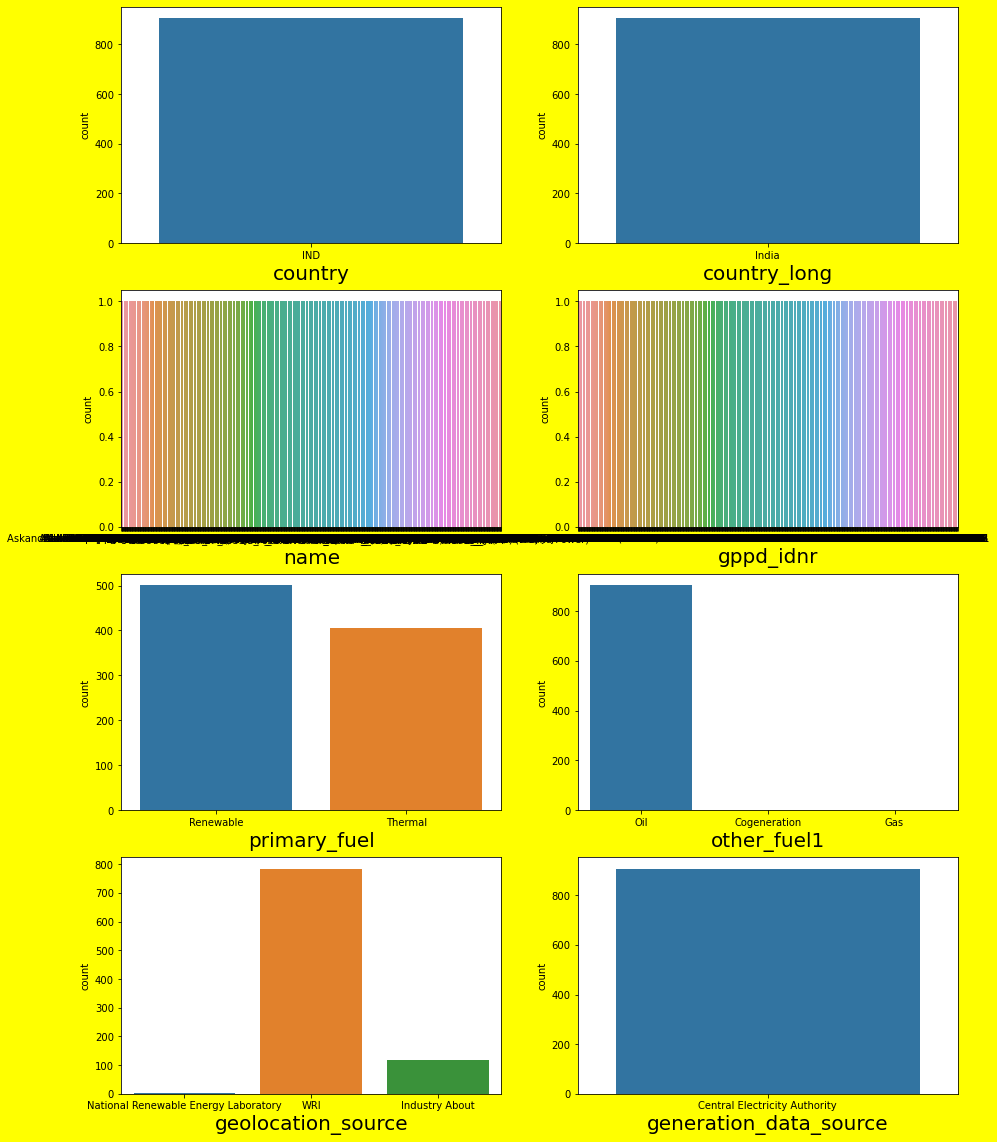

In [15]:
plt.figure(figsize=(15,20),facecolor='yellow')
num =1

for column in data_visualization_nominal:
    if num <=8:
        ax = plt.subplot(4,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

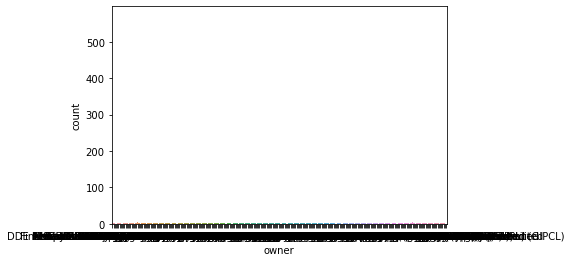

In [16]:
ax= sns.countplot(x='owner',data=data)

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


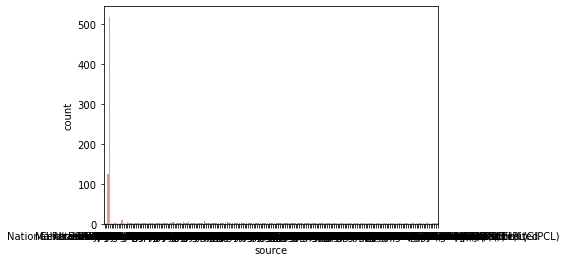

In [17]:
ax= sns.countplot(x='source',data=data)
print(data['source'].value_counts())

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

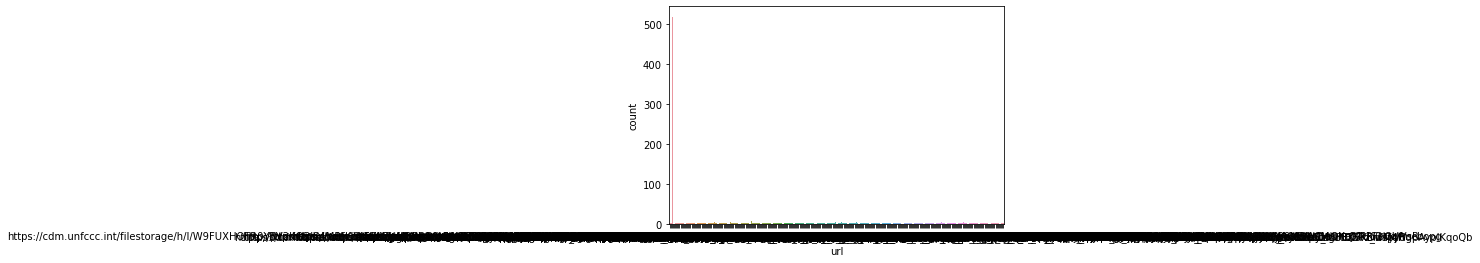

In [18]:
ax= sns.countplot(x='url',data=data)
print(data['url'].value_counts())

                                        Visualisation of continuous data

In [19]:
data_visualization_continuous=data[['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data',
                                         'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                                   'generation_gwh_2017','generation_gwh_2018']].copy()
data_visualization_continuous.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

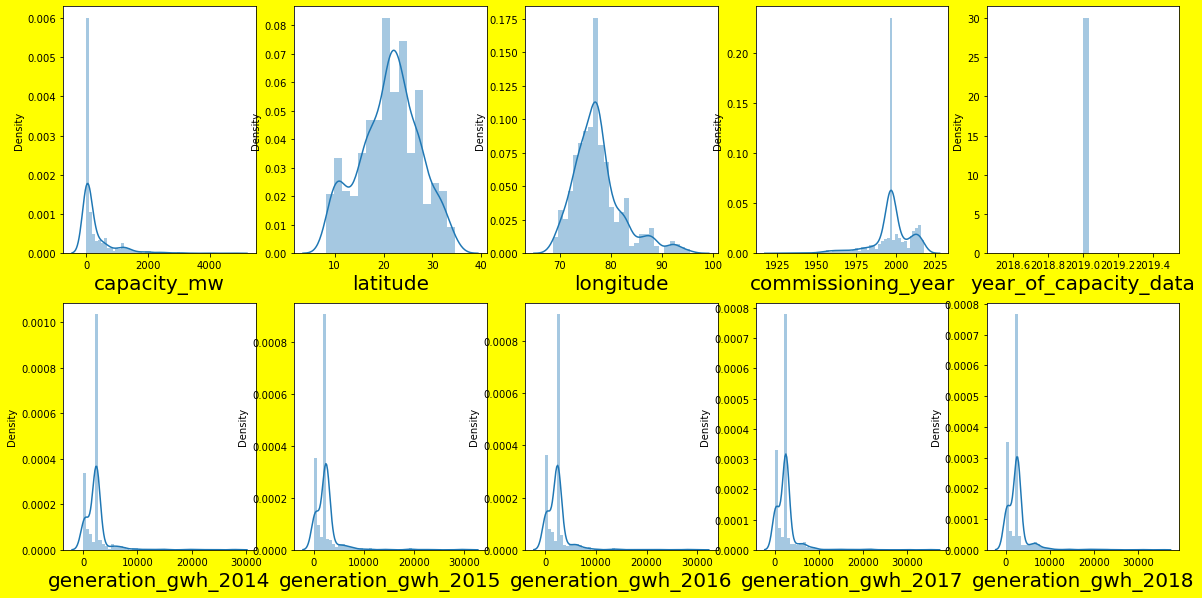

In [20]:
plt.figure(figsize=(20,10),facecolor ='yellow')
num =1

for column in data_visualization_continuous:
    if num <=10:
        ax = plt.subplot(2,5,num)
        sns.distplot(data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                            Encoding Technique
    
    Convert object data type into float datatype

In [21]:
enc=OrdinalEncoder()

In [22]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [23]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,0.0,2.0,2011.000000,...,109.0,128.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,1997.091082,...,174.0,173.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,0.0,2.0,1997.091082,...,21.0,205.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,1.0,2.0,2004.000000,...,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.000000,...,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0


# Analysis

In [24]:
data.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,...,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,0.447630,1.995590,1997.091082,...,43.847850,94.469680,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,0.497524,0.081259,13.016360,...,44.642818,70.381222,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,...,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,0.000000,2.000000,1997.091082,...,22.000000,58.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,0.000000,2.000000,1997.091082,...,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,1.000000,2.000000,2003.000000,...,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,1.000000,2.000000,2018.000000,...,190.000000,303.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


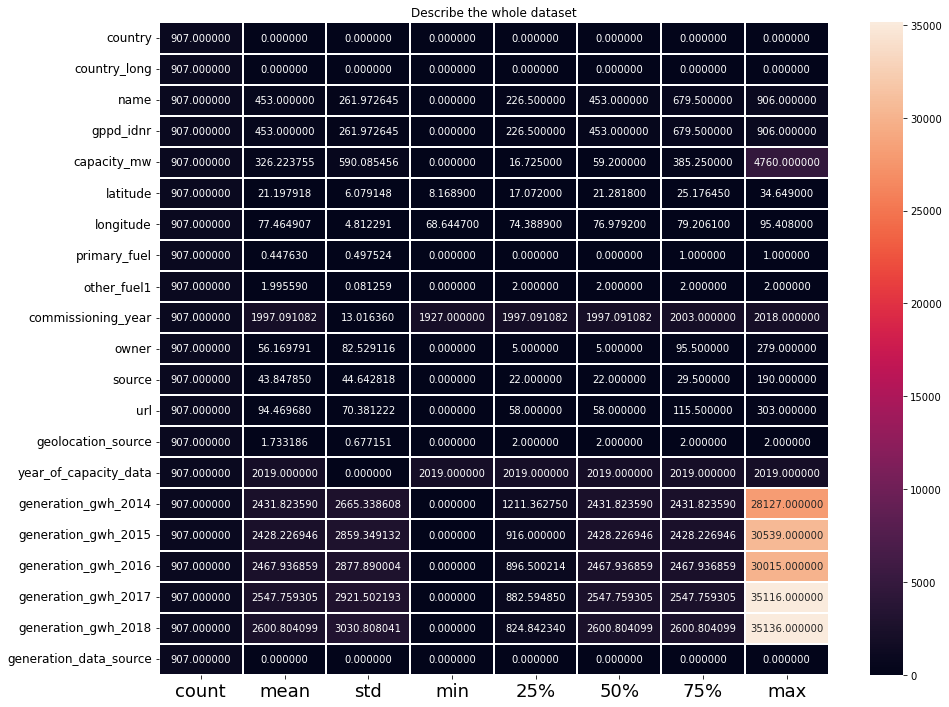

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                          Describe the data set
    
* There is no null values

* The nummber of rows and columns are:
    
    rows = 907
    columns = 21

* The mean, std, minimum and maximum values are:
    
    country                   
           mean: 0.00
           std: 0.00
           minimum: 0.00
           maximum: 0.00
           
    country_long              
           mean: 0.00
           std: 0.00
           minimum: 0.00
           maximum: 0.00
           
    name                      
           mean: 453.00
           std: 261.97
           minimum: 0.00
           maximum: 906.00
           
    gppd_idnr                 
           mean: 453.00
           std: 261.97
           minimum: 0.00
           maximum: 906.00
           
    capacity_mw              
           mean: 326.22
           std: 590.08
           minimum: 0.00
           maximum: 4760.00
           
    latitude                 
           mean: 21.19
           std: 6.07
           minimum: 8.16
           maximum: 34.64
           
    longitude                
           mean: 77.46
           std: 4.81
           minimum: 68.64
           maximum: 95.40
           
    primary_fuel  
           mean: 0.44
           std: 0.49
           minimum: 0.00
           maximum: 1.00
           
    other_fuel1 
           mean: 1.99
           std: 0.08
           minimum: 0.00
           maximum: 2.00
           
    commissioning_year 
           mean: 1997.09
           std: 13.01
           minimum: 1927.00
           maximum: 2018.00
           
    owner  
           mean: 56.16
           std: 82.52
           minimum: 0.00
           maximum: 279.00
           
    source 
           mean: 43.84
           std: 44.64
           minimum: 0.00
           maximum: 190.00
           
    url    
           mean: 94.46
           std: 70.38
           minimum: 0.00
           maximum: 303.00
           
    geolocation_source  
           mean: 1.73
           std: 0.67
           minimum: 0.00
           maximum: 2.00
           
    year_of_capacity_data  
           mean: 2019.00
           std: 0.00
           minimum: 2019.00
           maximum: 2019.00
           
    generation_gwh_2014       
           mean: 2431.82
           std: 2665.33
           minimum: 0.00
           maximum: 28127.00
           
    generation_gwh_2015   
           mean: 2428.22
           std: 2859.34
           minimum: 0.00
           maximum: 30539.00
           
    generation_gwh_2016  
          mean: 2467.93
           std: 2877.89
           minimum: 0.00
           maximum: 30015.00
           
    generation_gwh_2017  
           mean: 2547.75
           std: 2921.50
           minimum: 0.00
           maximum: 35116.00
           
    generation_gwh_2018
           mean: 2600.80
           std: 3030.80
           minimum: 0.00
           maximum: 35136.00
           
    generation_data_source 
           mean: 0.00
           std: 0.00
           minimum: 0.00
           maximum: 0.00
    

* country ,country_long, year_of_capacity_data and generation_data_source has a constant value and there is no standard deviation about its mean

In [26]:
data.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.332205,0.060240,-0.135247,0.020279,-0.032129,-0.074663,-0.043569,...,-1.463951e-02,4.191727e-02,3.622452e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,NaN,NaN,0.332205,1.000000,-0.335742,-0.105728,-0.377812,-0.277671,0.002333,0.044059,...,4.163838e-01,5.970803e-01,-4.641741e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,NaN,NaN,0.060240,-0.335742,1.000000,0.050984,0.195882,0.414034,0.003105,0.274292,...,-2.421218e-01,-2.438304e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,NaN,NaN,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.088571,0.036695,0.102069,...,5.592656e-02,-1.310376e-01,-1.842751e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,NaN
longitude,NaN,NaN,0.020279,-0.377812,0.195882,0.036362,1.000000,0.191592,0.030311,0.092331,...,-2.393334e-01,-3.029847e-01,2.523426e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,NaN
primary_fuel,NaN,NaN,-0.032129,-0.277671,0.414034,-0.088571,0.191592,1.000000,-0.060322,0.336376,...,4.858968e-02,-2.759887e-01,3.549003e-01,NaN,2.281729e-01,2.279656e-01,2.385919e-01,2.562142e-01,2.495757e-01,NaN
other_fuel1,NaN,NaN,-0.074663,0.002333,0.003105,0.036695,0.030311,-0.060322,1.000000,0.036904,...,2.658990e-02,2.815366e-02,-2.140831e-02,NaN,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,NaN,NaN,-0.043569,0.044059,0.274292,0.102069,0.092331,0.336376,0.036904,1.000000,...,2.152776e-02,1.091016e-02,-7.843657e-03,NaN,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,NaN


<AxesSubplot:>

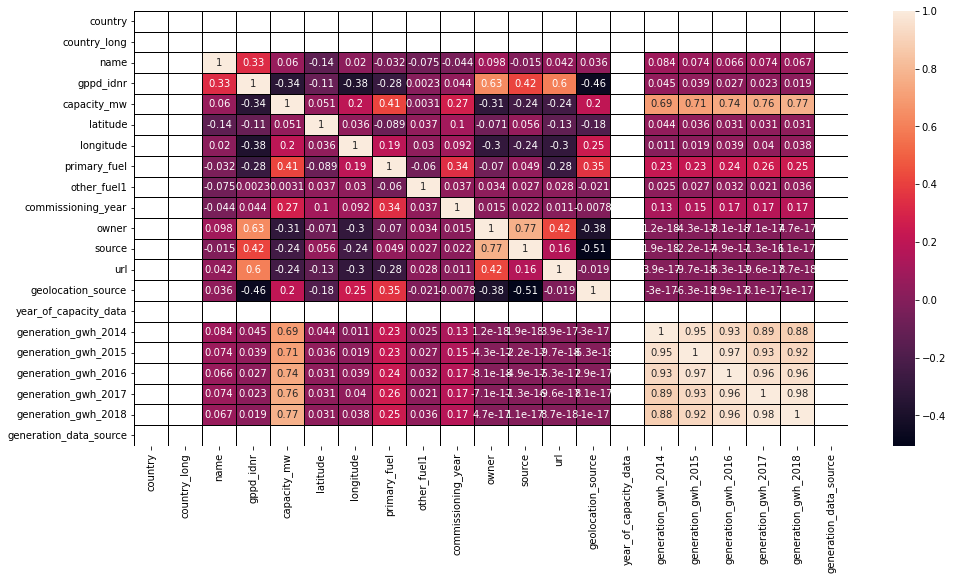

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

There are four columns that are country ,country_long, year_of_capacity_data and generation_data_source which have no correlation

So we drop those columns because:
    
    * there is no standard deviation about its means
    * there is no correlation

In [28]:
data=data.drop(['country','country_long','year_of_capacity_data','generation_data_source'],axis=1)
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,0.0,2.0,2011.000000,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,1997.091082,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,0.0,2.0,1997.091082,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,1.0,2.0,2004.000000,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.000000,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


Relation b/w generation_gwh_2015 and capacity_mw


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

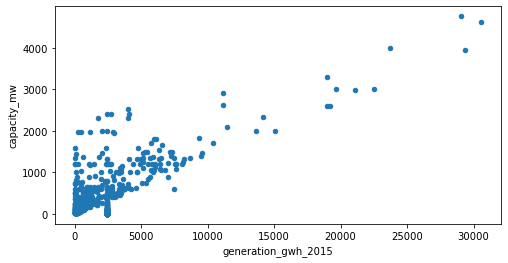

In [29]:
print("Relation b/w generation_gwh_2015 and capacity_mw")
data.plot(kind='scatter', x='generation_gwh_2015', y='capacity_mw',figsize=(8,4))

Relation b/w generation_gwh_2016 and capacity_mw


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

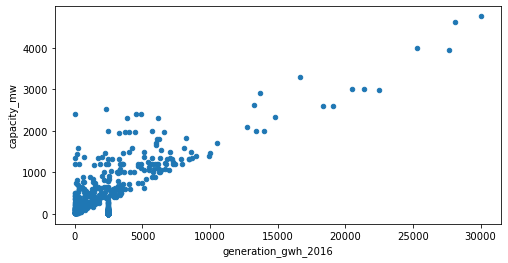

In [30]:
print("Relation b/w generation_gwh_2016 and capacity_mw")
data.plot(kind='scatter', x='generation_gwh_2016', y='capacity_mw',figsize=(8,4))

Relation b/w generation_gwh_2017 and capacity_mw


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

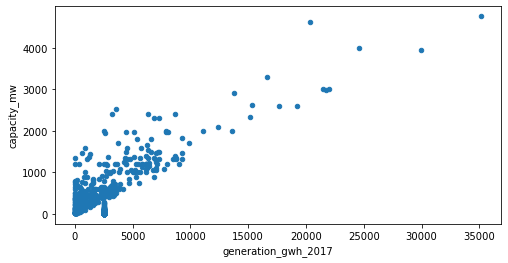

In [31]:
print("Relation b/w generation_gwh_2017 and capacity_mw")
data.plot(kind='scatter', x='generation_gwh_2017', y='capacity_mw',figsize=(8,4))

Relation b/w generation_gwh_2018 and capacity_mw


<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

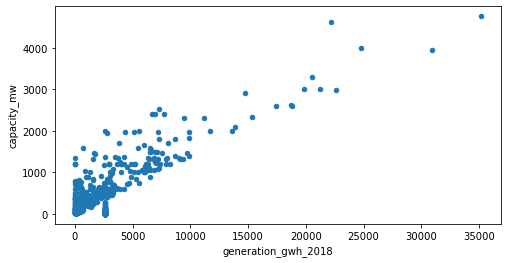

In [32]:
print("Relation b/w generation_gwh_2018 and capacity_mw")
data.plot(kind='scatter', x='generation_gwh_2018', y='capacity_mw',figsize=(8,4))

In all the case it is positively related and in starting 0 to 15000 there is the large values present.

                                           Outliers
                                           
Outliers is not consider on categorical data and on target variable                                          

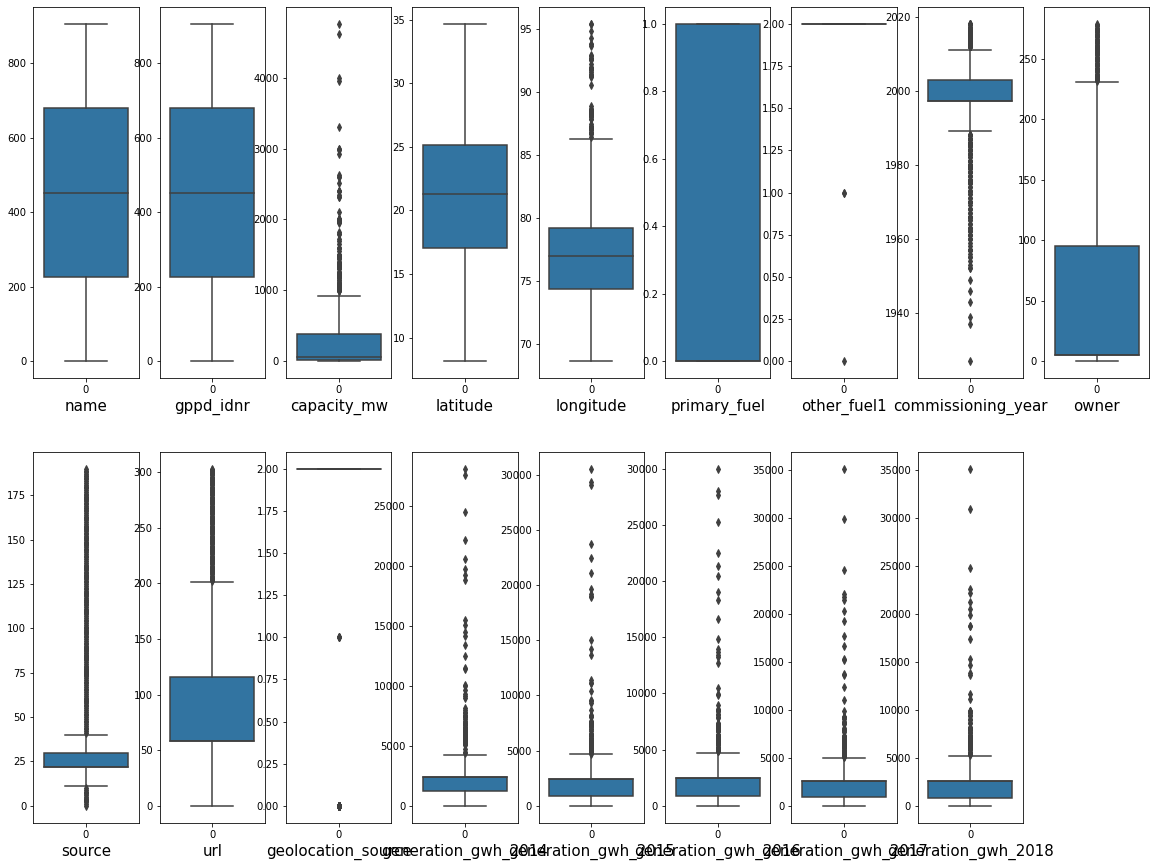

In [33]:
plt.figure(figsize=(20,15))
number = 1

for column in data:
    if number <=17:
        plt.subplot(2,9,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers are present in the columns:
    
    * capacity_mw
    * longitude
    * commissioning_year
    * generation_gwh_2014
    * generation_gwh_2015
    * generation_gwh_2016
    * generation_gwh_2017
    * generation_gwh_2018   

                                           Skewness
    
Skewness is not consider on categorical data and on target variable                                          

In [34]:
data.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.210990
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                   1.364406
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

Take (-0.5,0.5) as threshold range of skewness.

Eight columns where skewness is present:
    
    * capacity_mw
    * longitude
    * commissioning_year
    * generation_gwh_2014
    * generation_gwh_2015
    * generation_gwh_2016
    * generation_gwh_2017
    * generation_gwh_2018

# Target variable = primary_fuel

                                         CLASSIFICATION PROBLEM
    
    The data of primary_fuel is not overfitted.

In [35]:
data_new=data
data_new.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,0.0,2.0,2011.000000,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,1997.091082,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,0.0,2.0,1997.091082,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,1.0,2.0,2004.000000,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.000000,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [36]:
data_new.corr()['primary_fuel']

name                  -0.032129
gppd_idnr             -0.277671
capacity_mw            0.414034
latitude              -0.088571
longitude              0.191592
primary_fuel           1.000000
other_fuel1           -0.060322
commissioning_year     0.336376
owner                 -0.069836
source                 0.048590
url                   -0.275989
geolocation_source     0.354900
generation_gwh_2014    0.228173
generation_gwh_2015    0.227966
generation_gwh_2016    0.238592
generation_gwh_2017    0.256214
generation_gwh_2018    0.249576
Name: primary_fuel, dtype: float64

The correlation of independent variable with dependent variable:
    
    * name has 3% correlation with the target variable.
    * gppd_idnr has 27% correlation with the target variable.
    * capacity_mw has 41% correlation with the target variable.
    * latitude has 8% correlation with the target variable.
    * longitude has 19% correlation with the target variable.
    * other_fuel has 6% correlation with the target variable.
    * commissioning_year has 33% correlation with the target variable.
    * owner has 6% correlation with the target variable.
    * source has 4% correlation with the target variable.
    * url has 27% correlation with the target variable.
    * geolocation_source has 35% correlation with the target variable.
    * generation_gwh_2014 has 22% correlation with the target variable.
    * generation_gwh_2015 has 22% correlation with the target variable.
    * generation_gwh_2016 has 23% correlation with the target variable.
    * generation_gwh_2017 has 25% correlation with the target variable.
    * generation_gwh_2018 has 24% correlation with the target variable.

                                    Variance_Inflation_Factor

In [37]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.459678,name
1,4.259898,gppd_idnr
2,4.535718,capacity_mw
3,1.117815,latitude
4,1.252195,longitude
5,1.020632,other_fuel1
6,1.211157,commissioning_year
7,3.782901,owner
8,3.111254,source
9,2.073625,url


Five columns VIF greater than 5 so remove one by column and check the vif. 
If on droping more than four columns still we get vif higher so,we do not consider vif .

Drop generation_gwh_2017 column

In [39]:
data_new=data_new.drop(['generation_gwh_2017'],axis=1)

In [40]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.456561,name
1,4.258728,gppd_idnr
2,4.524630,capacity_mw
3,1.117747,latitude
4,1.252139,longitude
5,1.014168,other_fuel1
6,1.211120,commissioning_year
7,3.782600,owner
8,3.111238,source
9,2.073605,url


Now drop generation_gwh_2016 column

In [41]:
data_new=data_new.drop(['generation_gwh_2016'],axis=1)

In [42]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.456214,name
1,4.257252,gppd_idnr
2,4.523912,capacity_mw
3,1.116711,latitude
4,1.246963,longitude
5,1.014168,other_fuel1
6,1.207778,commissioning_year
7,3.781768,owner
8,3.111186,source
9,2.072342,url


Now drop generation_gwh_2015 column

In [43]:
data_new=data_new.drop(['generation_gwh_2015'],axis=1)

In [44]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.455893,name
1,4.256728,gppd_idnr
2,4.504961,capacity_mw
3,1.116559,latitude
4,1.246938,longitude
5,1.014086,other_fuel1
6,1.207389,commissioning_year
7,3.780603,owner
8,3.111186,source
9,2.071125,url


Now drop generation_gwh_2018 column

In [45]:
data_new=data_new.drop(['generation_gwh_2018'],axis=1)

In [46]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.439670,name
1,4.191481,gppd_idnr
2,3.175048,capacity_mw
3,1.116157,latitude
4,1.244287,longitude
5,1.012845,other_fuel1
6,1.199389,commissioning_year
7,3.760366,owner
8,3.109974,source
9,2.064624,url


Now, there is no multicolinearity exist in the data.

                                        Removing Outliers

In [47]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [48]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([ 15,  71,  80, 143, 143, 147, 158, 179, 183, 191, 209, 209, 222,
       244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364,
       364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 494,
       494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638,
       648, 648, 657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724,
       726, 726, 728, 767, 786, 786, 788, 807, 808, 808, 811, 813, 817,
       818, 832, 847, 848, 870, 871, 879, 880, 880, 895, 900], dtype=int64), array([ 2,  8,  8,  2, 11,  2, 11,  4,  4,  8,  2, 11,  6,  4,  8,  2, 11,
        8,  4,  4,  4,  6,  8,  4,  2,  2, 11,  6,  2,  4,  4,  6,  6,  6,
        2,  6,  2, 11,  2, 11,  4,  4,  6,  6,  4,  6,  4,  6,  6,  6,  6,
        4,  2, 11,  2, 11,  8,  8,  8,  2, 11,  6,  6, 11, 11,  2, 11,  6,
        2,  2, 11,  2,  6,  2, 11,  5,  5,  5,  4,  8,  4,  6,  8,  8,  8,
        2, 11,  8,  8], dtype=int64))


Outliers are also shown in source column which is categorical.So, we do not remove those outliers and consider the above
dataset.

                                    Removing Skewness

In [49]:
data_new['capacity_mw']=np.sqrt(data_new['capacity_mw'])
data_new['longitude']=np.sqrt(data_new['longitude'])
data_new['commissioning_year']=pow(data_new['commissioning_year'],2)
data_new['generation_gwh_2014']=np.sqrt(data_new['generation_gwh_2014'])

In [50]:
data_new.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             1.472953
latitude               -0.149698
longitude               1.036861
primary_fuel            0.210990
other_fuel1           -20.453120
commissioning_year     -1.364443
owner                   1.364406
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     0.972850
dtype: float64

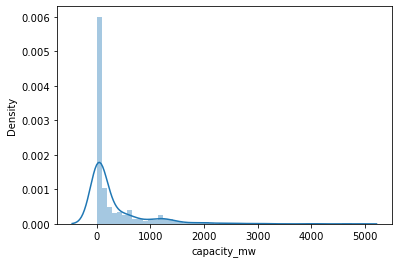

In [51]:
ax= sns.distplot(data['capacity_mw'])

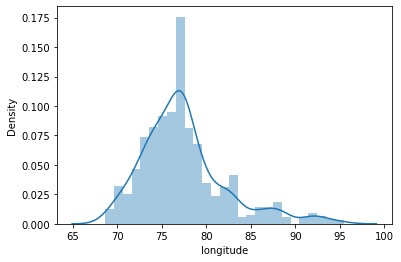

In [52]:
ax= sns.distplot(data['longitude'])

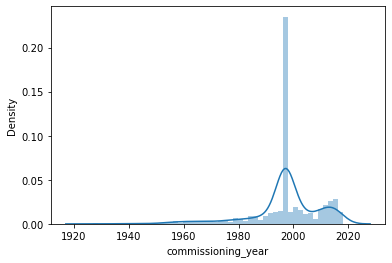

In [53]:
ax= sns.distplot(data['commissioning_year'])

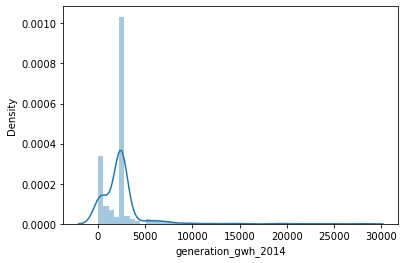

In [54]:
ax= sns.distplot(data['generation_gwh_2014'])

Still skewness and outliers are present in the columns:

    * capacity_mw
    * longitude
    * commissioning_year
    * generation_gwh_2014
    
So,we drop them    

In [55]:
data_new=data_new.drop({'capacity_mw','longitude','commissioning_year','generation_gwh_2014'},axis=1)
data_new.head()

,name,gppd_idnr,latitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source
0,0.0,657.0,28.1839,0.0,2.0,229.0,109.0,128.0,1.0
1,1.0,519.0,24.7663,1.0,2.0,258.0,174.0,173.0,2.0
2,2.0,853.0,21.9038,0.0,2.0,2.0,21.0,205.0,2.0
3,3.0,0.0,23.8712,1.0,2.0,5.0,22.0,58.0,2.0
4,4.0,1.0,21.9603,1.0,2.0,5.0,22.0,58.0,2.0


                                           Model Testing

In [56]:
x=data_new.drop(['primary_fuel'],axis=1)
y=data_new['primary_fuel']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                       Logistic Regression

In [57]:
lor=LogisticRegression()

In [58]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lor.fit(x_train,y_train)
    pred_train=lor.predict(x_train)
    pred_test=lor.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 74.9
Testing accuracy score: 69.8


The model perform very well
random state 1
Training accuracy score: 75.3
Testing accuracy score: 73.1


The model perform very well
random state 2
Training accuracy score: 70.8
Testing accuracy score: 64.8


The model perform very well
random state 3
Training accuracy score: 75.0
Testing accuracy score: 68.1


The model perform very well
random state 4
Training accuracy score: 73.7
Testing accuracy score: 72.5


The model perform very well
random state 5
Training accuracy score: 73.7
Testing accuracy score: 78.6


The model perform very well
random state 6
Training accuracy score: 76.3
Testing accuracy score: 72.0


The model perform very well
random state 7
Training accuracy score: 73.8
Testing accuracy score: 72.5


The model perform very well
random state 8
Training accuracy score: 73.9
Testing accuracy score: 77.5


The model perform very well
random state 9
Training accuracy sco

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=86)  

In [60]:
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 81.31868131868131


In [61]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[74 25]
 [ 9 74]]


In [62]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81        99
         1.0       0.75      0.89      0.81        83

    accuracy                           0.81       182
   macro avg       0.82      0.82      0.81       182
weighted avg       0.83      0.81      0.81       182



In [63]:
for j in range(2,10):
    cv_score=cross_val_score(lor,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.684642763369023


At cross fold 3 the cv score is 0.6989414173205399


At cross fold 4 the cv score is 0.7056157654672333


At cross fold 5 the cv score is 0.7022645862424868


At cross fold 6 the cv score is 0.7033954920413618


At cross fold 7 the cv score is 0.7253343555669137


At cross fold 8 the cv score is 0.7374243129948765


At cross fold 9 the cv score is 0.7221672167216722




In [64]:
lorscore=cross_val_score(lor,x_scaled,y,cv=8)
lorc=lorscore.mean()
print('cross val score:',lorc*100)

cross val score: 73.74243129948765


                                      K Neighbors Classifier

In [65]:
knn= KNeighborsClassifier()

In [66]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 86.1
Testing accuracy score: 78.0


The model perform very well
random state 1
Training accuracy score: 86.5
Testing accuracy score: 78.6


The model perform very well
random state 2
Training accuracy score: 87.3
Testing accuracy score: 78.0


The model perform very well
random state 3
Training accuracy score: 86.1
Testing accuracy score: 77.5


The model perform very well
random state 4
Training accuracy score: 87.2
Testing accuracy score: 76.9


The model perform very well
random state 5
Training accuracy score: 85.8
Testing accuracy score: 80.8


The model perform very well
random state 6
Training accuracy score: 85.8
Testing accuracy score: 80.2


The model perform very well
random state 7
Training accuracy score: 85.9
Testing accuracy score: 80.2


The model perform very well
random state 8
Training accuracy score: 85.5
Testing accuracy score: 79.7


The model perform very well
random state 9
Training accuracy sco

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=54) 

In [68]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 87.91208791208791


In [69]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[91 15]
 [ 7 69]]


In [70]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       106
         1.0       0.82      0.91      0.86        76

    accuracy                           0.88       182
   macro avg       0.88      0.88      0.88       182
weighted avg       0.88      0.88      0.88       182



In [71]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7573931985490756


At cross fold 3 the cv score is 0.7595749641189284


At cross fold 4 the cv score is 0.721029394565514


At cross fold 5 the cv score is 0.7330338170117175


At cross fold 6 the cv score is 0.745178343209016


At cross fold 7 the cv score is 0.7318596132549622


At cross fold 8 the cv score is 0.7231505201055737


At cross fold 9 the cv score is 0.764103410341034




In [72]:
knnscore=cross_val_score(knn,x_scaled,y,cv=9)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 76.4103410341034


                                    Random Forest Classifier

In [73]:
rfc=RandomForestClassifier()

In [74]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 78.6


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 77.5


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 78.6


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 81.3


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 80.2


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 81.3


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 84.1


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 80.8


The model perform very well
random state 8
Training accuracy score: 100.0
Testing accuracy score: 83.5


The model perform very well
random state 9
Training acc

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=31)

In [78]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 86.26373626373626


In [79]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[83 11]
 [14 74]]


In [80]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        94
         1.0       0.87      0.84      0.86        88

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.86      0.86       182



In [81]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7529465822563235


At cross fold 3 the cv score is 0.745240749240487


At cross fold 4 the cv score is 0.7386602861486882


At cross fold 5 the cv score is 0.7319834861271325


At cross fold 6 the cv score is 0.7551484257000117


At cross fold 7 the cv score is 0.7417667603714115


At cross fold 8 the cv score is 0.7319903741655023


At cross fold 9 the cv score is 0.7673377337733773




In [82]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=9)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 76.73597359735975


                                       Decision Tree Classifier

In [83]:
clf=DecisionTreeClassifier()

In [84]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 80.2


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 83.5


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 79.7


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 79.7


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 76.9


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 84.6


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 81.3


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 79.7


The model perform very well
random state 8
Training accuracy score: 100.0
Testing accuracy score: 85.2


The model perform very well
random state 9
Training acc

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 35)

In [86]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 87.91208791208791


In [87]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[90 12]
 [10 70]]


In [88]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       102
         1.0       0.85      0.88      0.86        80

    accuracy                           0.88       182
   macro avg       0.88      0.88      0.88       182
weighted avg       0.88      0.88      0.88       182



In [89]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7507609572988689


At cross fold 3 the cv score is 0.7221457245062254


At cross fold 4 the cv score is 0.7277055475420062


At cross fold 5 the cv score is 0.7550968368647927


At cross fold 6 the cv score is 0.7584524224468456


At cross fold 7 the cv score is 0.7803901524831758


At cross fold 8 the cv score is 0.7671460176991151


At cross fold 9 the cv score is 0.7905280528052806




In [90]:
clfscore=cross_val_score(clf,x_scaled,y,cv=9)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 79.27392739273927


                                            SVC

In [91]:
svc=SVC()

In [92]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 78.9
Testing accuracy score: 79.7


The model perform very well
random state 1
Training accuracy score: 78.2
Testing accuracy score: 76.9


The model perform very well
random state 2
Training accuracy score: 78.5
Testing accuracy score: 79.7


The model perform very well
random state 3
Training accuracy score: 79.9
Testing accuracy score: 74.7


The model perform very well
random state 4
Training accuracy score: 78.9
Testing accuracy score: 78.0


The model perform very well
random state 5
Training accuracy score: 79.4
Testing accuracy score: 77.5


The model perform very well
random state 6
Training accuracy score: 79.0
Testing accuracy score: 74.7


The model perform very well
random state 7
Training accuracy score: 78.8
Testing accuracy score: 76.9


The model perform very well
random state 8
Training accuracy score: 77.7
Testing accuracy score: 81.3


The model perform very well
random state 9
Training accuracy sco

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 73)

In [94]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 86.26373626373626


In [95]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[77 16]
 [ 9 80]]


In [96]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86        93
         1.0       0.83      0.90      0.86        89

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.87      0.86      0.86       182



In [97]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7507974249010513


At cross fold 3 the cv score is 0.7661865524300774


At cross fold 4 the cv score is 0.7860853378035944


At cross fold 5 the cv score is 0.7727521097686842


At cross fold 6 the cv score is 0.7794019402811664


At cross fold 7 the cv score is 0.7738308203424483


At cross fold 8 the cv score is 0.7804106505201056


At cross fold 9 the cv score is 0.7827612761276127




In [98]:
svcscore=cross_val_score(svc,x_scaled,y,cv=4)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 78.60853378035944


The accuracy_score and cv_score of all the models:

    * Logistic Regression
            accuracy_score: 81.31
            cv_score: 73.74
                
    * K Neighbors Classifier
            accuracy_score: 87.91
            cv_score: 76.41
                
    * Decision Tree Classifier
            accuracy_score: 87.91
            cv_score: 79.27
                
    * Random Forest Classifier
            accuracy_score: 86.26
            cv_score: 76.73
                
    * SVC
            accuracy_score: 86.26
            cv_score: 78.60
                
 All the model gives better accuracy score but for more better result we go with the Decision Tree Classifier because this have
 higher score,higher cv_score and lesser values of False Positive and False Negative.

                                     DECISSION TREE CLASSIFIER
    Hyper parameter tuning

In [99]:
clf=DecisionTreeClassifier()

In [165]:
parameters={'criterion':['gini','entropy'],
            'max_depth': range(2,20),
            'min_samples_leaf':range(3,10),
            'min_samples_split':range(2,30)}

In [180]:
GCV=GridSearchCV(clf,parameters,cv=9,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [182]:
cl = DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=5 , min_samples_split=26)
cl.fit(x_train,y_train)
pred = cl.predict(x_test)
accuracy_score(y_test,pred)*100

85.16483516483517

                                   Plot ROC_AUC curve and find the AUC value

In [183]:
fpr,tpr,thresholds = roc_curve(y_test,pred)

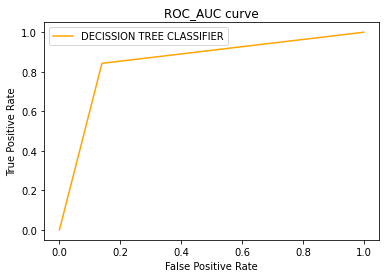

AUC_score 85.14558414884621


In [185]:
plt.plot(fpr,tpr,color='orange',label='DECISSION TREE CLASSIFIER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,pred)*100
print("AUC_score",auc_score)

accuracy_score = 87.91 and after hyper parameter tuning we get accuracy_score = 85.16 but not increase that much.
AUC_score = 85.14

In [186]:
import joblib

joblib.dump(GCV.best_params_,"Global_Power_Plant_Database.pkl")

['Global_Power_Plant_Database.pkl']

                                            Conclusion

In [187]:
Output_data=pd.DataFrame({'Actual data':y_test,"Predicted data":pred})
Output_data

,Actual data,Predicted data
183,0.0,0.0
207,0.0,0.0
493,1.0,1.0
786,1.0,1.0
28,0.0,0.0
...,...,...
469,0.0,1.0
709,0.0,1.0
297,1.0,1.0
644,1.0,1.0


# Target variable = capacity_mw

                                        REGRESSION PROBLEM

In [221]:
new_data=data
new_data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,0.0,2.0,2011.000000,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,1997.091082,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,0.0,2.0,1997.091082,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,1.0,2.0,2004.000000,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.000000,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [222]:
new_data.corr()['capacity_mw']

name                   0.060240
gppd_idnr             -0.335742
capacity_mw            1.000000
latitude               0.050984
longitude              0.195882
primary_fuel           0.414034
other_fuel1            0.003105
commissioning_year     0.274292
owner                 -0.311048
source                -0.242122
url                   -0.243830
geolocation_source     0.204865
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
Name: capacity_mw, dtype: float64

The correlation of independent variable with dependent variable:

    * name has 6% correlation with the target variable.
    * gppd_idnr has 33% correlation with the target variable.
    * latitude has 5% correlation with the target variable.
    * longitude has 19% correlation with the target variable.
    * primary_fuel has 41% correlation with the target variable.
    * other_fuel has 0% correlation with the target variable.
    * commissioning_year has 27% correlation with the target variable.
    * owner has 31% correlation with the target variable.
    * source has 24% correlation with the target variable.
    * url has 24% correlation with the target variable.
    * geolocation_source has 20% correlation with the target variable.
    * generation_gwh_2014 has 69% correlation with the target variable.
    * generation_gwh_2015 has 71% correlation with the target variable.
    * generation_gwh_2016 has 74% correlation with the target variable.
    * generation_gwh_2017 has 75% correlation with the target variable.
    * generation_gwh_2018 has 77% correlation with the target variable.

                                     Variance Inflation Factor

In [224]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [225]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.386062,name
1,3.759434,gppd_idnr
2,1.138233,latitude
3,1.252405,longitude
4,1.895116,primary_fuel
5,1.027105,other_fuel1
6,1.261490,commissioning_year
7,3.756162,owner
8,3.404050,source
9,2.275836,url


Five columns VIF greater than 5 so remove one by column and check the vif. 
If on droping more than four columns still we get vif higher so,we do not consider vif .

Drop generation_gwh_2017 column

In [226]:
new_data=new_data.drop(['generation_gwh_2017'],axis=1)

In [227]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.383660,name
1,3.759431,gppd_idnr
2,1.137704,latitude
3,1.252369,longitude
4,1.879631,primary_fuel
5,1.022105,other_fuel1
6,1.258905,commissioning_year
7,3.756157,owner
8,3.402371,source
9,2.273631,url


Now drop generation_gwh_2016 column

In [228]:
new_data=new_data.drop(['generation_gwh_2016'],axis=1)

In [229]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.383376,name
1,3.757254,gppd_idnr
2,1.136411,latitude
3,1.247139,longitude
4,1.878605,primary_fuel
5,1.022096,other_fuel1
6,1.253665,commissioning_year
7,3.755533,owner
8,3.402352,source
9,2.273025,url


Now drop generation_gwh_2015 column

In [230]:
new_data=new_data.drop(['generation_gwh_2015'],axis=1)

In [231]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.381827,name
1,3.752351,gppd_idnr
2,1.136143,latitude
3,1.247135,longitude
4,1.875246,primary_fuel
5,1.021971,other_fuel1
6,1.253471,commissioning_year
7,3.754872,owner
8,3.401454,source
9,2.270351,url


Now,there is no multicolinearity

                                        Removing Outliers

In [232]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [233]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([ 15,  71,  80, 143, 143, 158, 179, 183, 191, 209, 209, 222, 244,
       299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 364, 364, 371,
       416, 427, 444, 454, 478, 484, 493, 493, 494, 494, 499, 519, 538,
       541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 657, 657,
       661, 669, 689, 695, 695, 706, 709, 721, 721, 724, 724, 726, 726,
       728, 786, 786, 807, 808, 808, 811, 813, 817, 818, 832, 847, 848,
       870, 871, 879, 880, 880, 895, 900], dtype=int64), array([12,  8,  8, 11, 12, 11,  3,  3,  8, 11, 12,  6,  3,  8, 11, 12,  8,
        3,  3,  3,  6,  8,  3, 11, 12,  6,  3,  3,  6,  6,  6,  6, 11, 12,
       11, 12,  3,  3,  6,  6,  3,  6,  3,  6,  6,  6,  6,  3, 11, 12, 11,
       12,  8,  8,  8, 11, 12,  6,  6, 11, 12, 11, 12, 11, 12,  6, 11, 12,
        6, 11, 12,  5,  5,  5,  3,  8,  3,  6,  8,  8,  8, 11, 12,  8,  8],
      dtype=int64))


Outliers are also shown in source column which is categorical.So, we do not remove those outliers and consider the above
dataset.

                                       Removing Skewness

In [234]:
new_data['longitude']=np.sqrt(new_data['longitude'])
new_data['commissioning_year']=pow(new_data['commissioning_year'],2)
new_data['generation_gwh_2014']=np.sqrt(new_data['generation_gwh_2014'])
new_data['generation_gwh_2018']=np.sqrt(new_data['generation_gwh_2018'])

In [235]:
new_data.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.036861
primary_fuel            0.210990
other_fuel1           -20.453120
commissioning_year     -1.364443
owner                   1.364406
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     0.972850
generation_gwh_2018     0.908129
dtype: float64

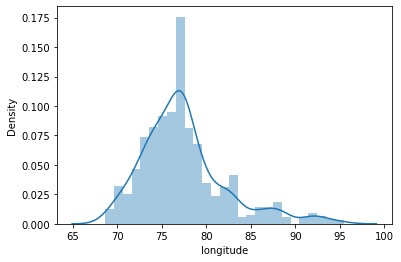

In [236]:
ax= sns.distplot(data['longitude'])

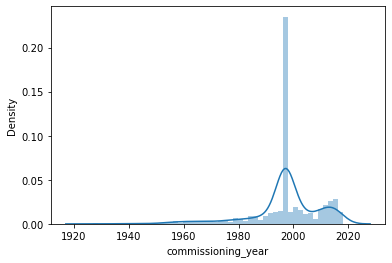

In [237]:
ax= sns.distplot(data['commissioning_year'])

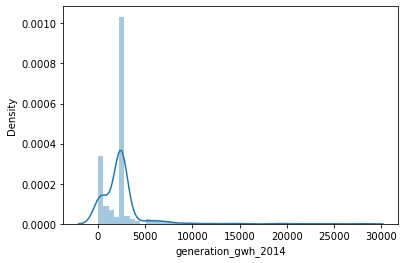

In [238]:
ax= sns.distplot(data['generation_gwh_2014'])

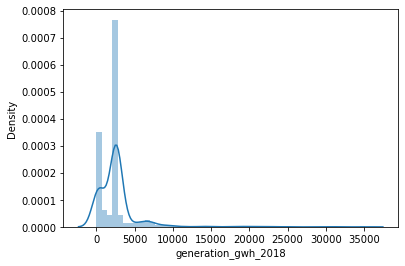

In [239]:
ax= sns.distplot(data['generation_gwh_2018'])

Still skewness and outliers are present in these four columns:
    
    *
    *
    * 
    *
    
So,we drop those columns

In [240]:
new_data=new_data.drop({'longitude','commissioning_year','generation_gwh_2014','generation_gwh_2018'},axis=1)
new_data.head()

,name,gppd_idnr,capacity_mw,latitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source
0,0.0,657.0,2.5,28.1839,0.0,2.0,229.0,109.0,128.0,1.0
1,1.0,519.0,98.0,24.7663,1.0,2.0,258.0,174.0,173.0,2.0
2,2.0,853.0,39.2,21.9038,0.0,2.0,2.0,21.0,205.0,2.0
3,3.0,0.0,135.0,23.8712,1.0,2.0,5.0,22.0,58.0,2.0
4,4.0,1.0,1800.0,21.9603,1.0,2.0,5.0,22.0,58.0,2.0


                                          Model Testing

In [241]:
x=new_data.drop(['capacity_mw'],axis=1)
y=new_data['capacity_mw']

In [242]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                      Linear Regression

In [243]:
lr=LinearRegression()

In [244]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 30.6
Testing accuracy score: 31.6


The model perform very well
random state 1
Training accuracy score: 31.5
Testing accuracy score: 28.3


The model perform very well
random state 2
Training accuracy score: 31.0
Testing accuracy score: 30.4


The model perform very well
random state 3
Training accuracy score: 29.8
Testing accuracy score: 36.5


The model perform very well
random state 4
Training accuracy score: 32.4
Testing accuracy score: 24.7


The model perform very well
random state 5
Training accuracy score: 30.4
Testing accuracy score: 33.2


The model perform very well
random state 6
Training accuracy score: 30.7
Testing accuracy score: 32.2


The model perform very well
random state 7
Training accuracy score: 29.7
Testing accuracy score: 36.2


The model perform very well
random state 8
Training accuracy score: 30.8
Testing accuracy score: 31.9


The model perform very well
random state 9
Training accuracy sco

In [245]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =18)

In [246]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 39.63741512333269


In [247]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.18721870310450373


At cross fold 3 the cv score is 0.2592254601236678


At cross fold 4 the cv score is 0.28419252255590555


At cross fold 5 the cv score is 0.2912698971099338


At cross fold 6 the cv score is 0.28637253495803455


At cross fold 7 the cv score is 0.29556950533885873


At cross fold 8 the cv score is 0.2878376948748207


At cross fold 9 the cv score is 0.29359377883708304




In [248]:
lrscore=cross_val_score(lr,x_scaled,y,cv=7)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 29.556950533885875


In [249]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 268.3687994785607
Mean square error: 127781.20460701815
Root mean square error: 357.46496976209875


                                     Decision Tree Regressor

In [259]:
dtr=DecisionTreeRegressor()

In [260]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 12.6


random state 1
Training accuracy score: 100.0
Testing accuracy score: -4.2


random state 2
Training accuracy score: 100.0
Testing accuracy score: -43.6


random state 3
Training accuracy score: 100.0
Testing accuracy score: -20.8


random state 4
Training accuracy score: 100.0
Testing accuracy score: -5.0


random state 5
Training accuracy score: 100.0
Testing accuracy score: 24.5


random state 6
Training accuracy score: 100.0
Testing accuracy score: 37.8


random state 7
Training accuracy score: 100.0
Testing accuracy score: -8.7


random state 8
Training accuracy score: 100.0
Testing accuracy score: -38.3


random state 9
Training accuracy score: 100.0
Testing accuracy score: 28.4


random state 10
Training accuracy score: 100.0
Testing accuracy score: -26.2


random state 11
Training accuracy score: 100.0
Testing accuracy score: -1.6


random state 12
Training accuracy score: 100.0
Testing accuracy score:

In [261]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =57)

In [262]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 87.76992742698886


In [263]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.07351355245613495


At cross fold 3 the cv score is -0.3813032968483107


At cross fold 4 the cv score is -0.1468723176621375


At cross fold 5 the cv score is -0.11261536597172472


At cross fold 6 the cv score is -0.27894310760381935


At cross fold 7 the cv score is -0.16855082781198247


At cross fold 8 the cv score is -0.0009909105029149573


At cross fold 9 the cv score is -0.2554035206744109




In [264]:
dtrscore=cross_val_score(dtr,x_scaled,y,cv=8)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: 5.333086361260736


In [265]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 58.590934065934064
Mean square error: 63724.78221153846
Root mean square error: 252.43767985690738


                                        Random Forest Regressor

In [266]:
rfr=RandomForestRegressor()

In [312]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 91.5
Testing accuracy score: 49.3


random state 1
Training accuracy score: 93.1
Testing accuracy score: 20.4


random state 2
Training accuracy score: 91.5
Testing accuracy score: 23.0


random state 3
Training accuracy score: 91.4
Testing accuracy score: 48.6


random state 4
Training accuracy score: 91.6
Testing accuracy score: 23.6


random state 5
Training accuracy score: 91.5
Testing accuracy score: 43.0


random state 6
Training accuracy score: 91.0
Testing accuracy score: 36.2


random state 7
Training accuracy score: 91.4
Testing accuracy score: 29.4


random state 8
Training accuracy score: 91.9
Testing accuracy score: 24.5


random state 9
Training accuracy score: 90.1
Testing accuracy score: 50.9


random state 10
Training accuracy score: 92.7
Testing accuracy score: 22.8


random state 11
Training accuracy score: 90.5
Testing accuracy score: 53.6


random state 12
Training accuracy score: 91.4
Testing accuracy score: 33.3


random st

In [313]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =62)

In [314]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 88.87862314198242


In [270]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.3272759644036359


At cross fold 3 the cv score is 0.2412744088871732


At cross fold 4 the cv score is 0.30885549774322607


At cross fold 5 the cv score is 0.32544492642520706


At cross fold 6 the cv score is 0.16653388788117782


At cross fold 7 the cv score is 0.3517561427648948


At cross fold 8 the cv score is 0.35480893672694425


At cross fold 9 the cv score is 0.3332594552811726




In [271]:
rfrscore=cross_val_score(rfr,x_scaled,y,cv=8)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 36.192047406467665


In [272]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 108.14964417582418
Mean square error: 42641.91992838946
Root mean square error: 206.49920079358532


                                        Ada Boost Regressor

In [273]:
ada= AdaBoostRegressor()

In [274]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: -6.4
Testing accuracy score: 4.1


random state 1
Training accuracy score: 39.7
Testing accuracy score: -0.7


random state 2
Training accuracy score: 39.8
Testing accuracy score: -5.1


random state 3
Training accuracy score: 44.5
Testing accuracy score: 41.2


random state 4
Training accuracy score: 36.1
Testing accuracy score: 5.3


random state 5
Training accuracy score: 32.4
Testing accuracy score: 29.3


random state 6
Training accuracy score: 7.3
Testing accuracy score: -20.2


random state 7
Training accuracy score: 41.5
Testing accuracy score: 27.9


random state 8
Training accuracy score: 26.5
Testing accuracy score: -6.6


random state 9
Training accuracy score: 27.0
Testing accuracy score: 38.8


random state 10
Training accuracy score: 35.5
Testing accuracy score: 6.6


random state 11
Training accuracy score: 33.7
Testing accuracy score: 17.6


random state 12
Training accuracy score: 44.8
Testing accuracy score: 22.6


random state

In [275]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =96)

In [276]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

R2 score: 40.35076875737907


In [277]:
for j in range(2,10):
    cv_score=cross_val_score(ada,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.316606107751433


At cross fold 3 the cv score is -0.2136067217372399


At cross fold 4 the cv score is -0.011779281364359712


At cross fold 5 the cv score is -0.06970602886716046


At cross fold 6 the cv score is 0.012239440443310212


At cross fold 7 the cv score is -0.08235337098852942


At cross fold 8 the cv score is -0.028814170839136524


At cross fold 9 the cv score is -0.29740477868086146




In [278]:
adascore=cross_val_score(ada,x_scaled,y,cv=2)
adac=adascore.mean()
print('cross val score:',adac*100)

cross val score: 18.1211539994731


In [279]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 405.25558946659
Mean square error: 277743.47129387665
Root mean square error: 527.0137297014915


                                   Gradient Boosting Regressor

In [280]:
gb= GradientBoostingRegressor()

In [281]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 70.0
Testing accuracy score: 45.7


random state 1
Training accuracy score: 72.2
Testing accuracy score: 30.2


random state 2
Training accuracy score: 72.5
Testing accuracy score: 32.5


random state 3
Training accuracy score: 72.3
Testing accuracy score: 43.4


random state 4
Training accuracy score: 71.5
Testing accuracy score: 32.7


random state 5
Training accuracy score: 70.9
Testing accuracy score: 39.6


random state 6
Training accuracy score: 71.3
Testing accuracy score: 36.1


random state 7
Training accuracy score: 71.3
Testing accuracy score: 41.1


random state 8
Training accuracy score: 75.2
Testing accuracy score: 27.1


random state 9
Training accuracy score: 70.5
Testing accuracy score: 39.2


random state 10
Training accuracy score: 72.9
Testing accuracy score: 20.5


random state 11
Training accuracy score: 71.2
Testing accuracy score: 43.4


random state 12
Training accuracy score: 68.6
Testing accuracy score: 32.6


random st

In [282]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =46)

In [283]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 70.51508510648007


In [284]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.2785354223131265


At cross fold 3 the cv score is 0.17661751128404876


At cross fold 4 the cv score is 0.3215637245445977


At cross fold 5 the cv score is 0.333660400923387


At cross fold 6 the cv score is 0.25688669630991323


At cross fold 7 the cv score is 0.35199379834886946


At cross fold 8 the cv score is 0.31442338378812246


At cross fold 9 the cv score is 0.35531318049024124




In [285]:
gbscore=cross_val_score(gb,x_scaled,y,cv=9)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 35.32154443356216


In [286]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 153.18617766207163
Mean square error: 78855.6304067243
Root mean square error: 280.81244702955087


The value of r2 score and cv for the 5 machine learning model are:

Linear Regression 

        r2_score: 39.63
        cv   : 29.55
            
Decission Tree Regressor 

        r2_score: 87.76
        cv   : 5.83
            
Random Forest Regressor 

        r2_score: 88.87
        cv   : 36.19
            
AdaBoostRegressor 

        r2_score: 40.35
        cv   : 18.12
            
Gradient Boosting Regressor 

        r2_score: 70.51
        cv   : 35.32
        
            
  Decission Tree Regressor, Random Forest Regressor and Gradient Boosting Regressor  gives better r2_score  but in all of three 
 Random Forest Regressor have better score and minimum mean square square error also. So,we go with that model.  

                                   Random Forest Regressor
                                   
    Hyper parameter tuning

In [287]:
rfr=RandomForestRegressor()

In [301]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,50),
             'min_samples_leaf':range(2,10),
             'min_samples_split':range(2,10)}

In [302]:
from sklearn.model_selection import RandomizedSearchCV

In [303]:
RCV=RandomizedSearchCV(rfr,parameters,cv=8,n_jobs=-1)
RCV.fit(x_train,y_train)
RCV.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 42}

In [309]:
clf = RandomForestRegressor(min_samples_split=3,min_samples_leaf=4,max_features='auto',max_depth=49)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100

48.71332368418321

After hyper tuning there is no increment so we take orignal value of r2_score which we get from the random forest model that is
88.87

                                   Plot a graph b/w actual and predicted value

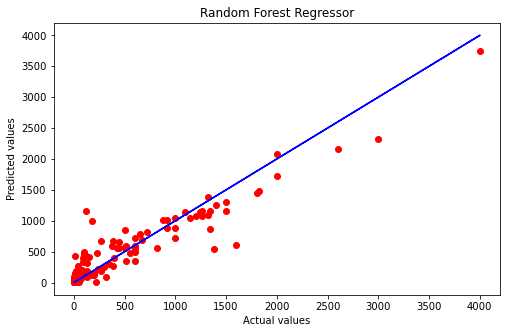

In [317]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

There is not much difference between actual and predicted values

                                         Save the file

In [318]:
filename='Global_Power_Plant_Database1.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [320]:
loaded_model= pickle.load(open('Global_Power_Plant_Database1.pkl','rb'))
result= loaded_model.score(x_test,y_test)
print(result)

0.8887862314198242


                                           Conclusion

In [321]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":pred_test})
Prediction

,Actual_value,Predicted_value
33,5.00,5.73000
280,1500.00,1296.46344
368,1240.00,1138.81410
499,126.00,98.66400
871,30.75,34.81100
...,...,...
73,10.00,23.75560
796,510.00,344.08950
624,35.00,29.17200
836,1.50,17.02600
